# Get all transactions for all years together (have to limit to Senate though)

In [0]:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import os
os.listdir(os.getcwd())

['.config', 'adc.json', '2014.csv.gz', 'sample_data']

In [0]:
gz_files = ['0B5SFXStyeVhrLVc5cWhzQlN0UzQ',
'0B5SFXStyeVhrNVlTc3N1RlltRkk',
'0B5SFXStyeVhrZi1relVzRVlwQUE',
'0B5SFXStyeVhranNWMEloUDBjQnM',
'0B5SFXStyeVhrZnpkLUoxMDN3YWs',
'0B5SFXStyeVhreXp4YzdRSmhMQ1k',
'0B5SFXStyeVhreU9JTG1NakZXSU0',
'0B5SFXStyeVhrNmMzTlRKa0lCcGc',
'0B5SFXStyeVhrWmg3c3dRbmRSSVE',
'0B5SFXStyeVhrTGdEUUx1Q2p2RGc',
'0B5SFXStyeVhrajlwYUEzMnZubWM',
'0B5SFXStyeVhrMU5PV1prVmVQd1U',
'0B5SFXStyeVhra3d4TE1oU09SeUk',
'0B5SFXStyeVhraDE3aVhyMVhxa2c',
'0B5SFXStyeVhrWVhRelJrcnh4SXc',
'0B5SFXStyeVhrYXZXZUdaNjVOQzg',
'0B5SFXStyeVhrcGRoZmxSM3NROGc']

In [59]:
# For original run these couldn't all be run together but this should theoretically work

senate_df = pd.DataFrame()

for gz in gz_files:
  print('\n \n \n processing %s'%(str(gz)))
  downloaded = drive.CreateFile({'id':gz}) 
  downloaded.GetContentFile(str(id)+ '.gz')  
    
  counter = 0

  for chunk in pd.read_csv(str(id)+ '.gz', iterator=True, chunksize=100000, 
                           encoding='Latin-1', low_memory=False, compression='gzip'):

    try: 
      if counter % 1000000 == 0:
        print('processed %d rows'%(counter))
        print(len(senate_df))
      senate_df = senate_df.append(chunk[chunk['seat'] == 'federal:senate'], ignore_index=True)
      counter += 100000
    except TypeError:
      continue
  senate_df.to_csv('senate_records.csv', index=False)


 
 
 processing 0B5SFXStyeVhrWVhRelJrcnh4SXc
processed 0 rows
0
processed 1000000 rows
0
processed 2000000 rows
0
processed 3000000 rows
0
processed 4000000 rows
56445
processed 5000000 rows
57143
processed 6000000 rows
239517
processed 7000000 rows
297285
processed 8000000 rows
369029
processed 9000000 rows
463163
processed 10000000 rows
493522
processed 11000000 rows
495503
processed 12000000 rows
518485
processed 13000000 rows
526427
processed 14000000 rows
533343
processed 15000000 rows
547625
processed 16000000 rows
549301
processed 17000000 rows
549615
processed 18000000 rows
549615

 
 
 processing 0B5SFXStyeVhrYXZXZUdaNjVOQzg
processed 0 rows
549615
processed 1000000 rows
549615
processed 2000000 rows
549615
processed 3000000 rows
549615
processed 4000000 rows
549615
processed 5000000 rows
627574
processed 6000000 rows
761387
processed 7000000 rows
1102579
processed 8000000 rows
1237168
processed 9000000 rows
1479551
processed 10000000 rows
1494354
processed 11000000 rows
1508

In [0]:
# Check that senate df contains 2008-12 otherwise need to re-run those ones. Other than that we should be good

In [47]:
len(senate_df)

2297589

In [48]:
senate_df['cycle'].value_counts()

2006    505884
2004    454269
2002    389768
2000    366395
1996    295086
1998    286187
Name: cycle, dtype: int64

In [0]:
senate_df.to_csv('2008_2012_senate_records.csv', index=False)

In [63]:
# You can save to GDrive from Colab via this kind of command

uploaded = drive.CreateFile({'title': '2008_2012_senate_records.csv'})
uploaded.SetContentFile('2008_2012_senate_records.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1mjLM7SVFxQ0PkIx0r5Ax-YpOElYrCPGl


# Prototyping w/ Presidential data

In [0]:
# Get packages set up
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd


#!pip install -U seaborn
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


from scipy.sparse import csr_matrix
from pandas.api.types import CategoricalDtype
from scipy.sparse.linalg import svds, eigs



# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Check if presidential campaign finance file is already downloaded

import os 
os.listdir(os.getcwd())

['.config',
 'presidential_contribution_data_1984_2014.csv',
 'adc.json',
 'sample_data']

In [0]:
print('downloading file')
file_id = '0B5SFXStyeVhrX0xycm9lOU5XWDg'
downloaded = drive.CreateFile({'id':file_id }) 
downloaded.GetContentFile('presidential_contribution_data_1984_2014.csv')  


downloading file


In [0]:
print('reading csv')
df = pd.read_csv('presidential_contribution_data_1984_2014.csv' , encoding='Latin-1')

reading csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9,10,11,12,14,19,20,21,28,36,37,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

In [0]:
# Get unique list of recipients/contributors and lean on categorical datatype for creating sparse matrix

contributors = CategoricalDtype(sorted(df['bonica.cid'].unique()), ordered=True)
recipients = CategoricalDtype(sorted(df['bonica.rid'].unique()), ordered=True)

In [0]:
# Map all rows in df to index of row for unique contributors / recipients - skip if running year partitioning
'''
row = df['bonica.cid'].astype(contributors).cat.codes
col = df['bonica.rid'].astype(recipients).cat.codes
'''

Similar line of inquiry & things to replicate from here:

http://faculty.ucr.edu/~hanneman/nettext/C17_Two_mode.html

processing 1980 elections
73.886991
election year 



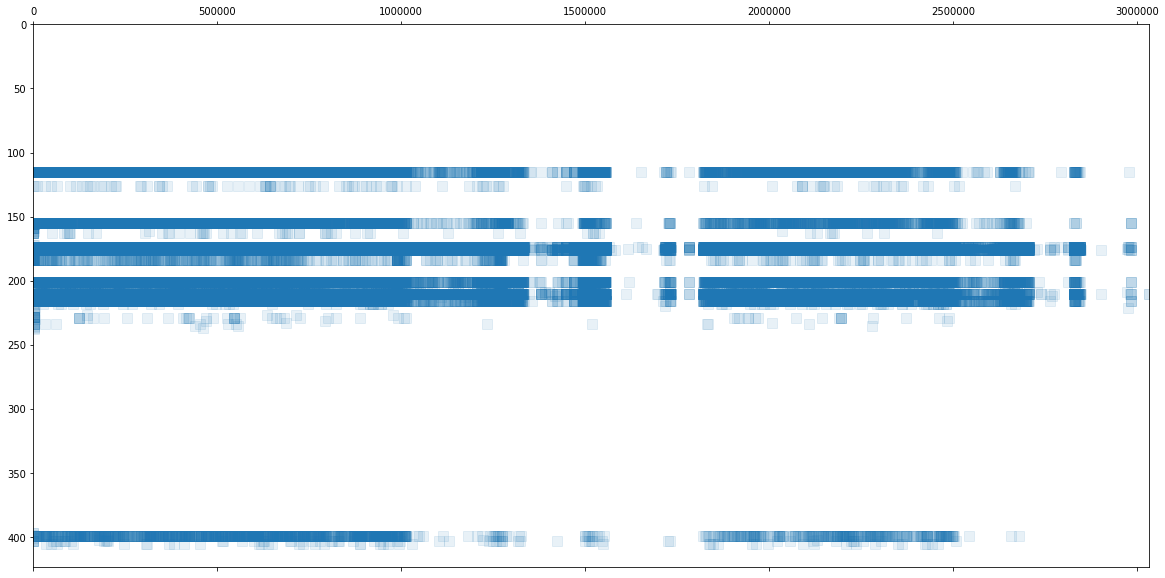

processing 1982 elections
1.527273


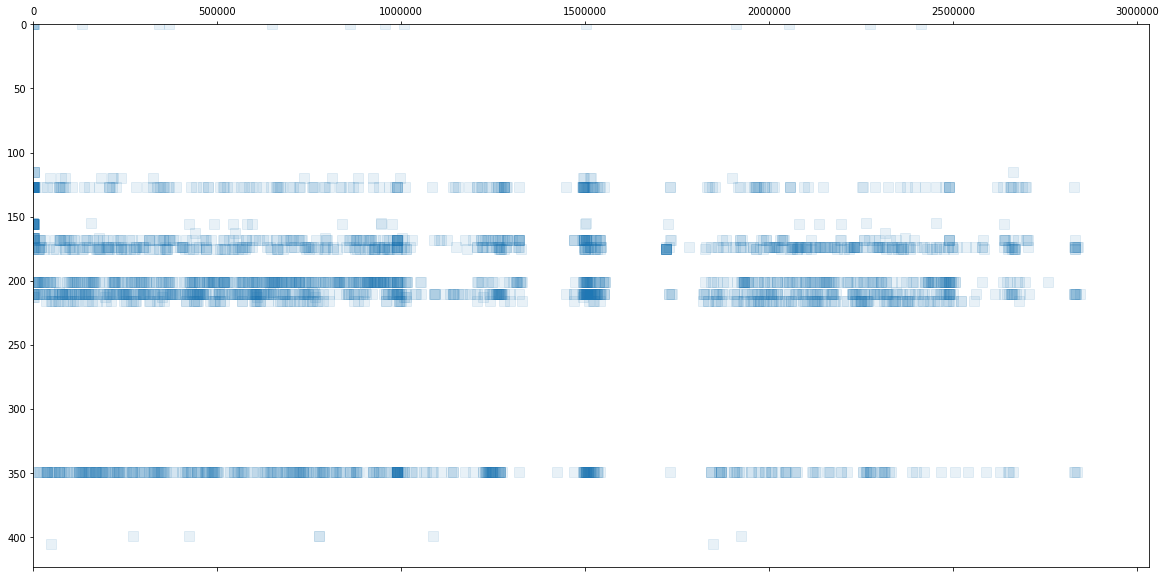

processing 1984 elections
36.677973
election year 



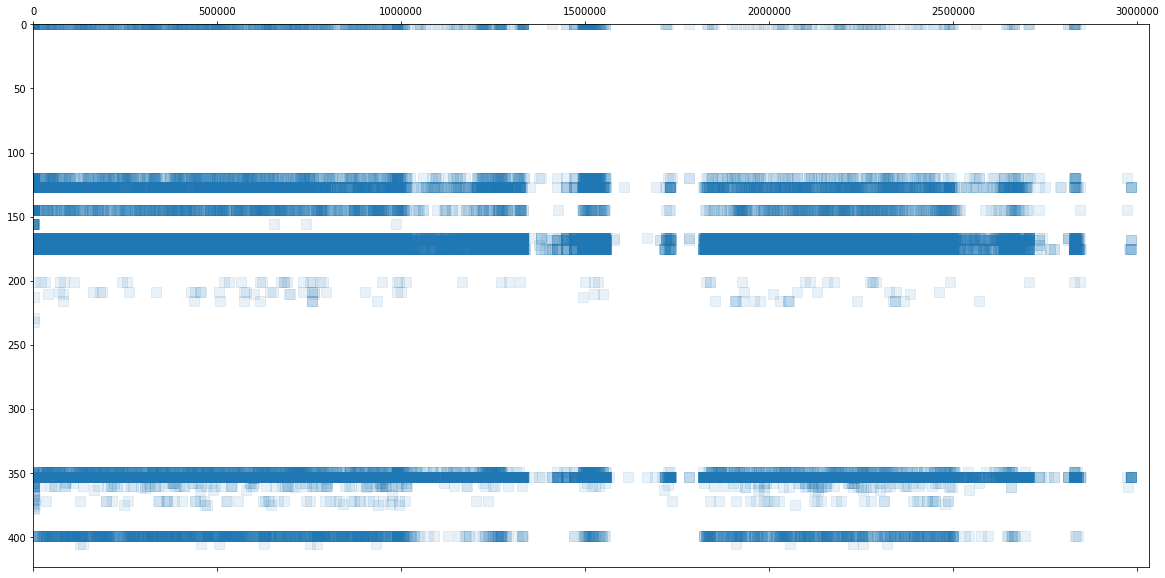

processing 1986 elections
2.359969


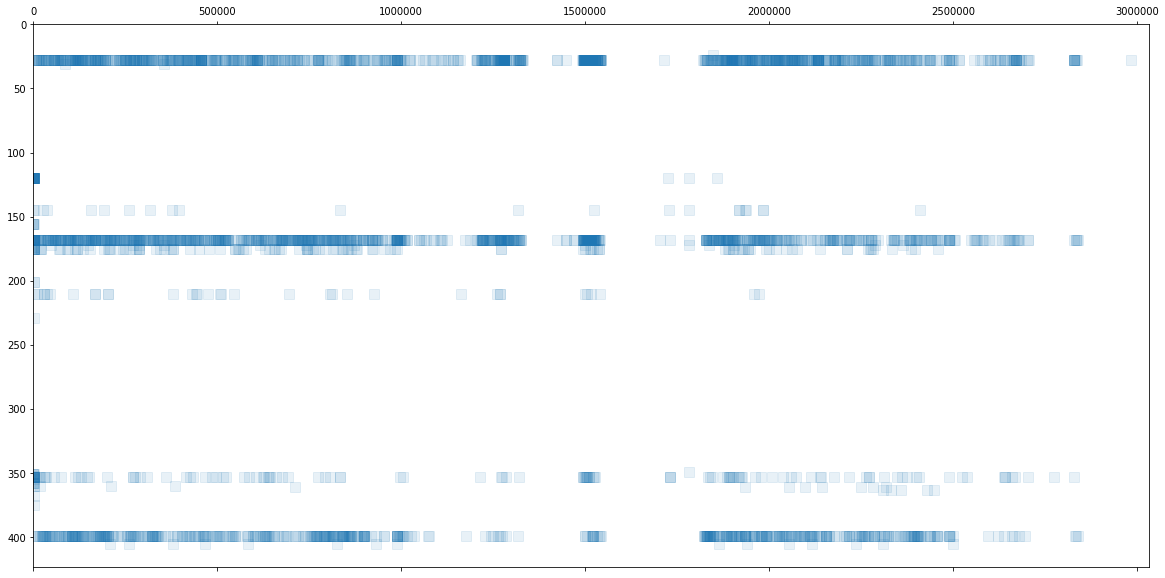

processing 1988 elections
111.729474
election year 



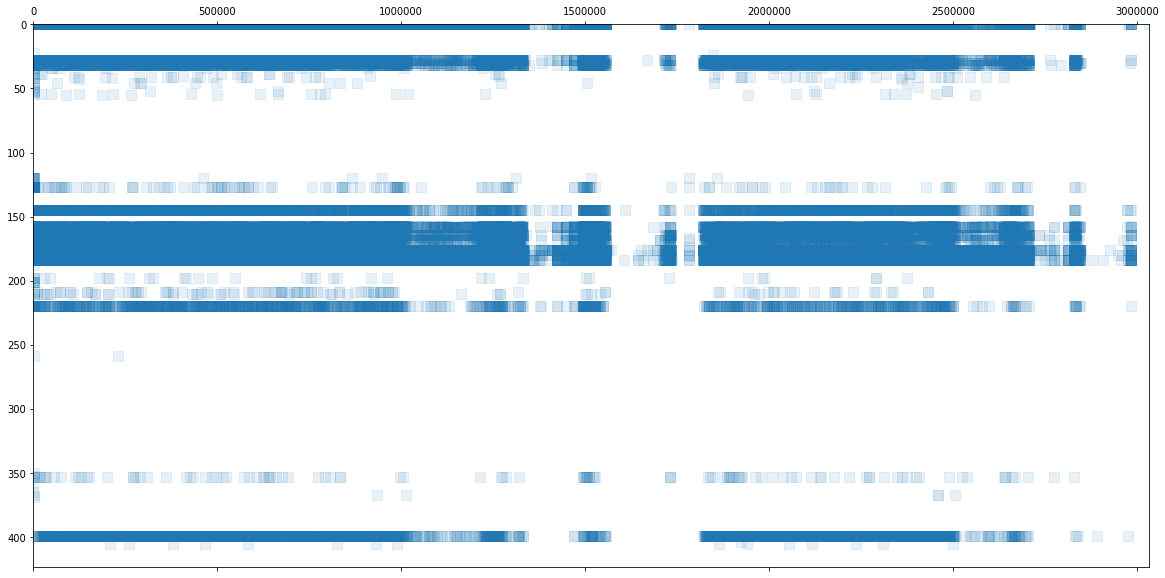

processing 1990 elections
4.392902


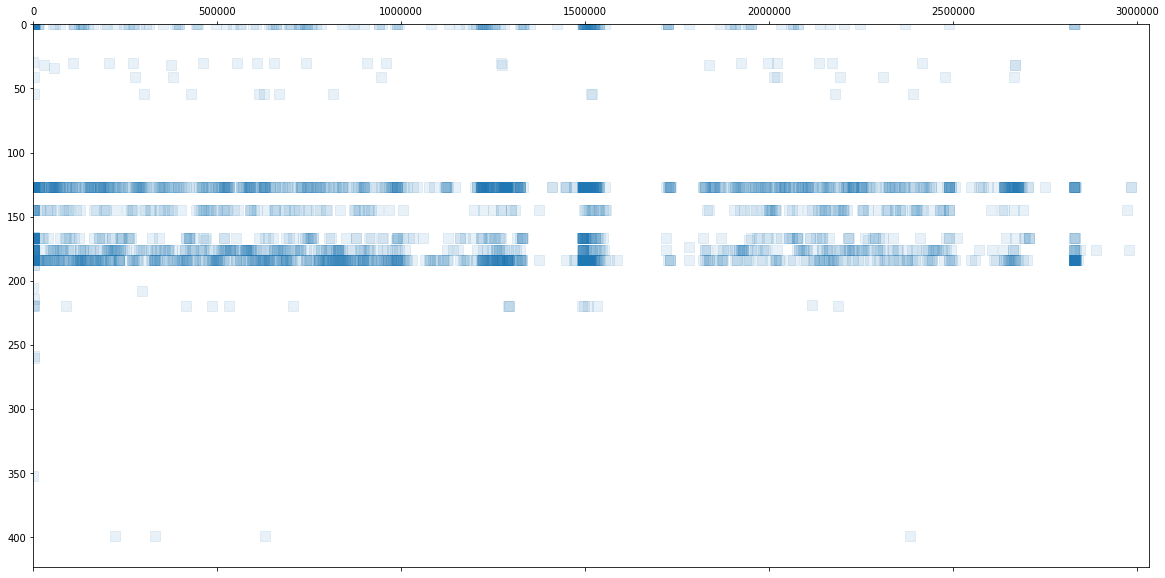

processing 1992 elections
134.039589
election year 



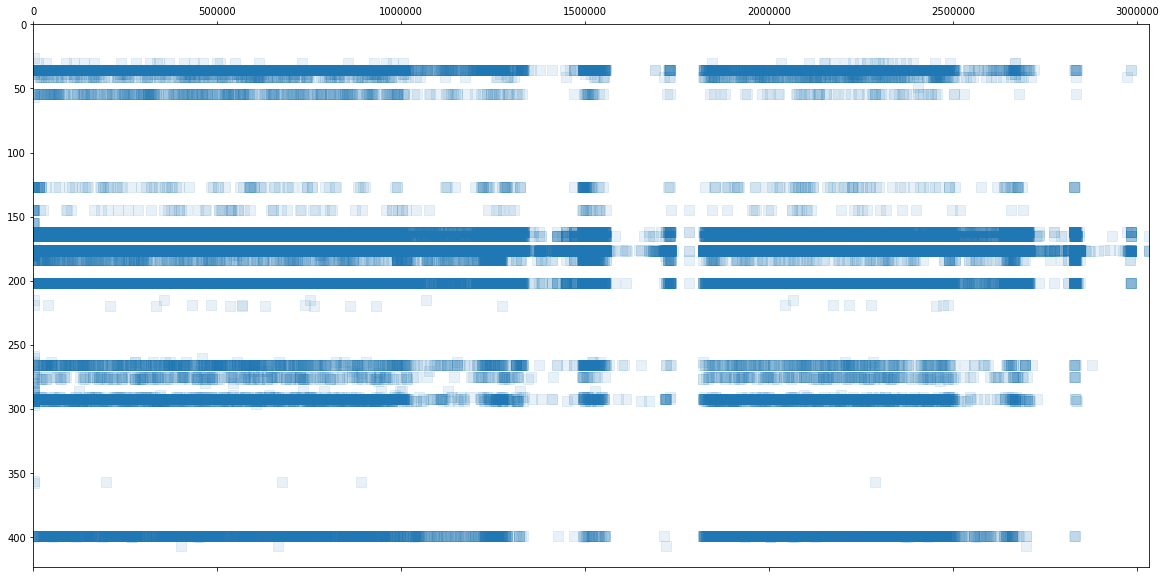

processing 1994 elections
10.341489


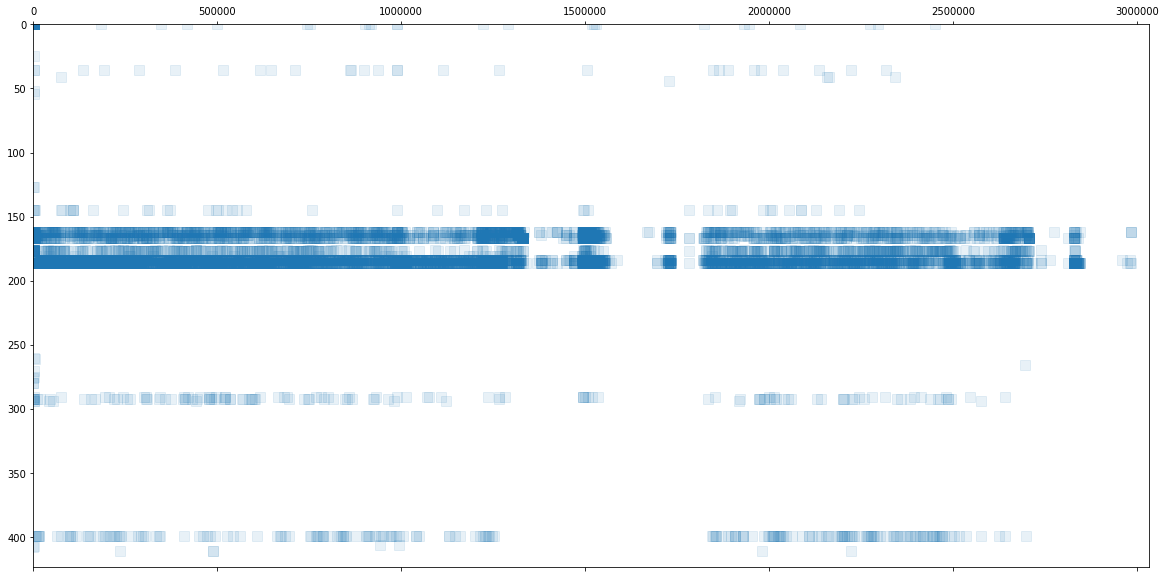

processing 1996 elections
158.289671
election year 



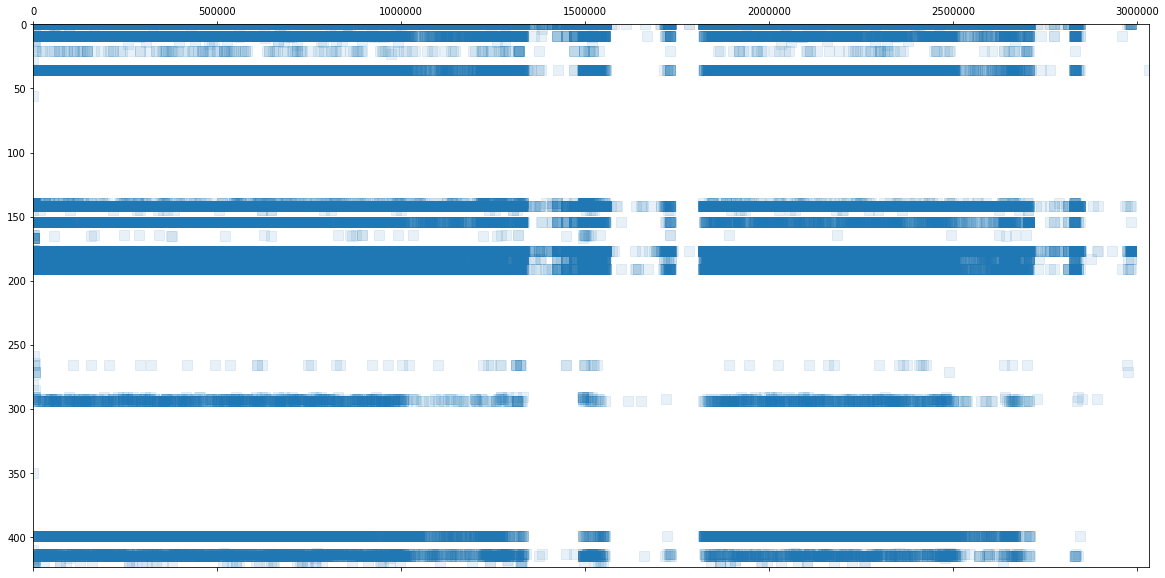

processing 1998 elections
9.119239


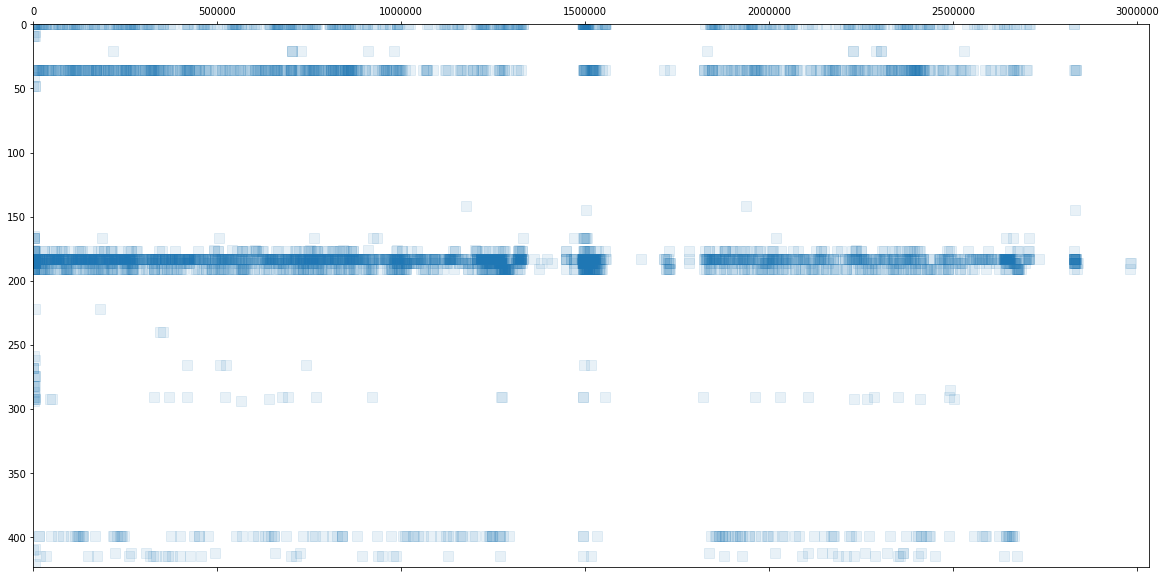

processing 2000 elections
215.387891
election year 



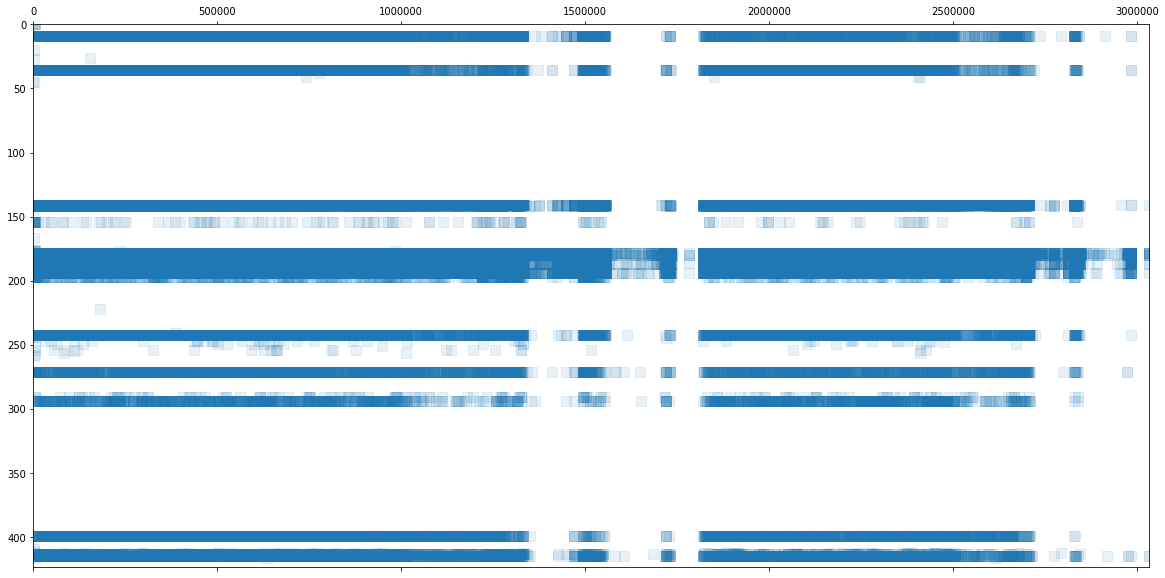

processing 2002 elections
7.17850061


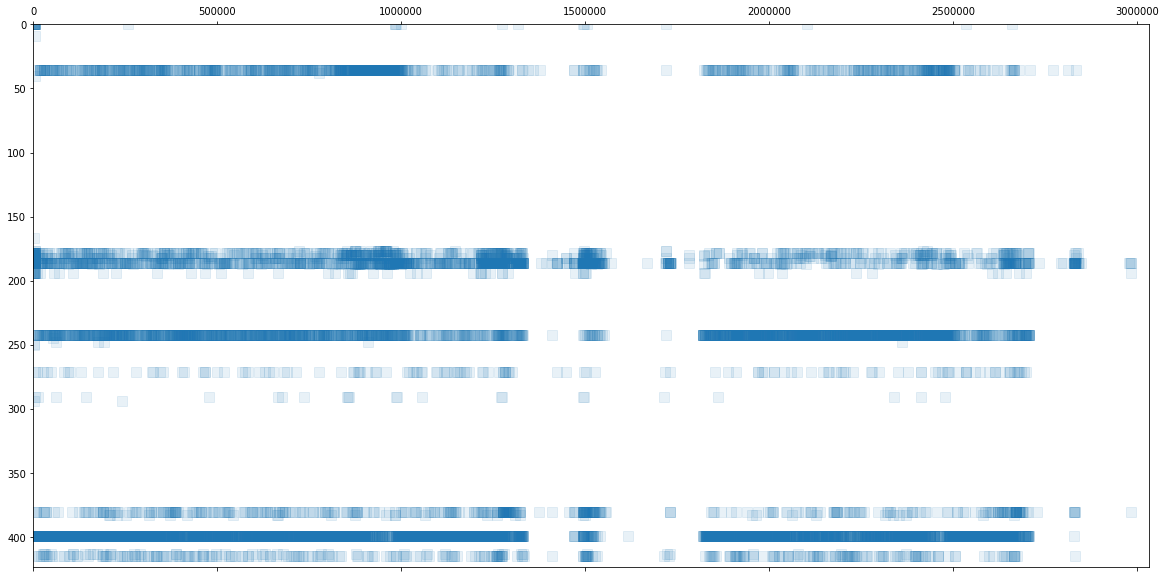

processing 2004 elections
876.1262518499998
election year 



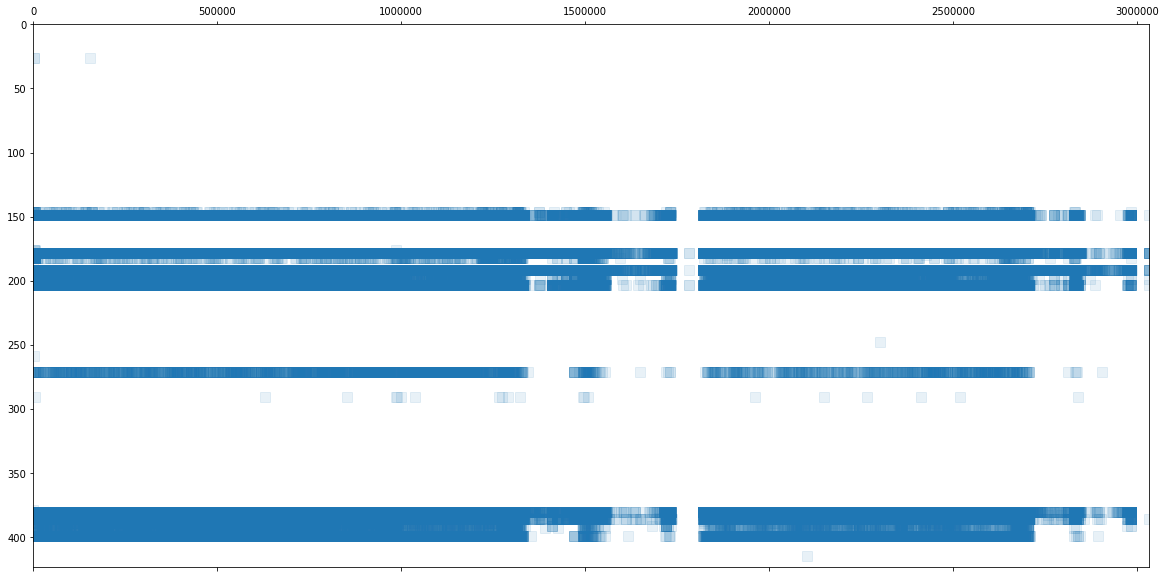

processing 2006 elections
21.609598929999994


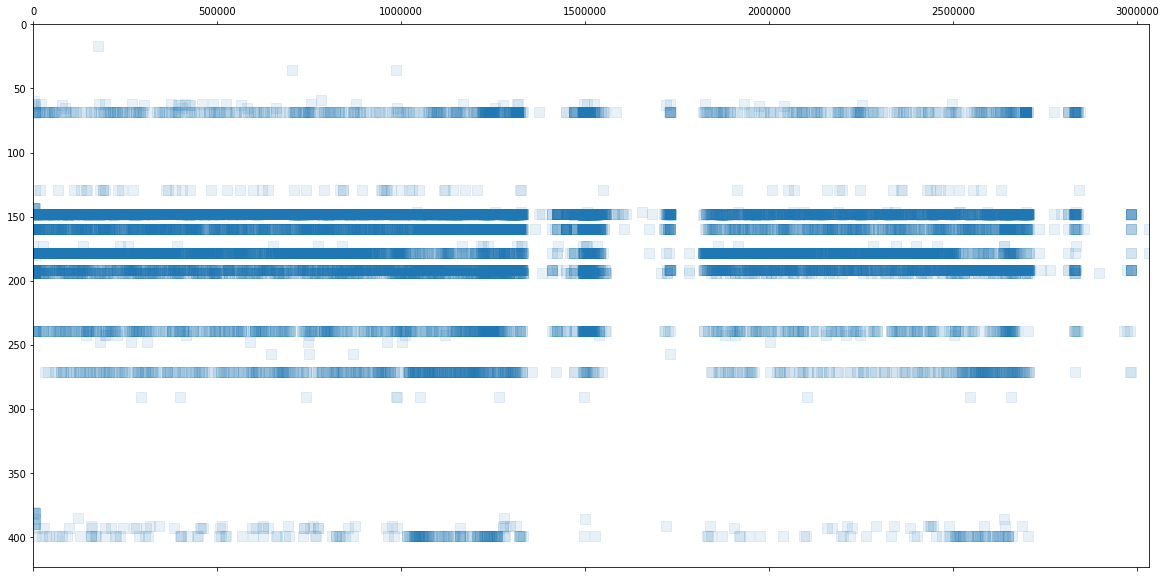

processing 2008 elections
1902.358986189999
election year 



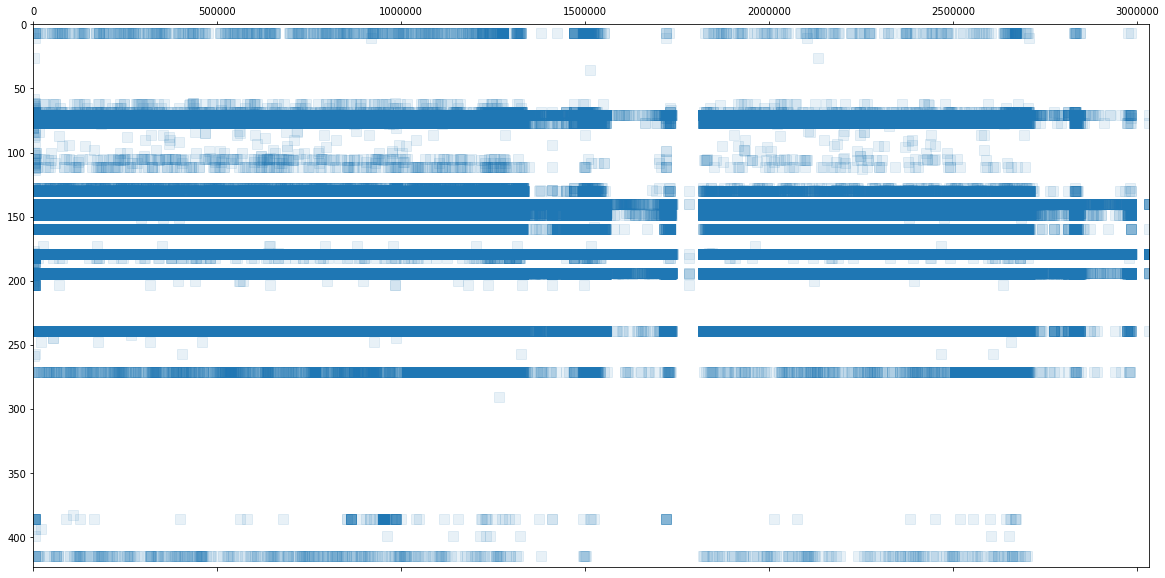

processing 2010 elections
31.160892810000018


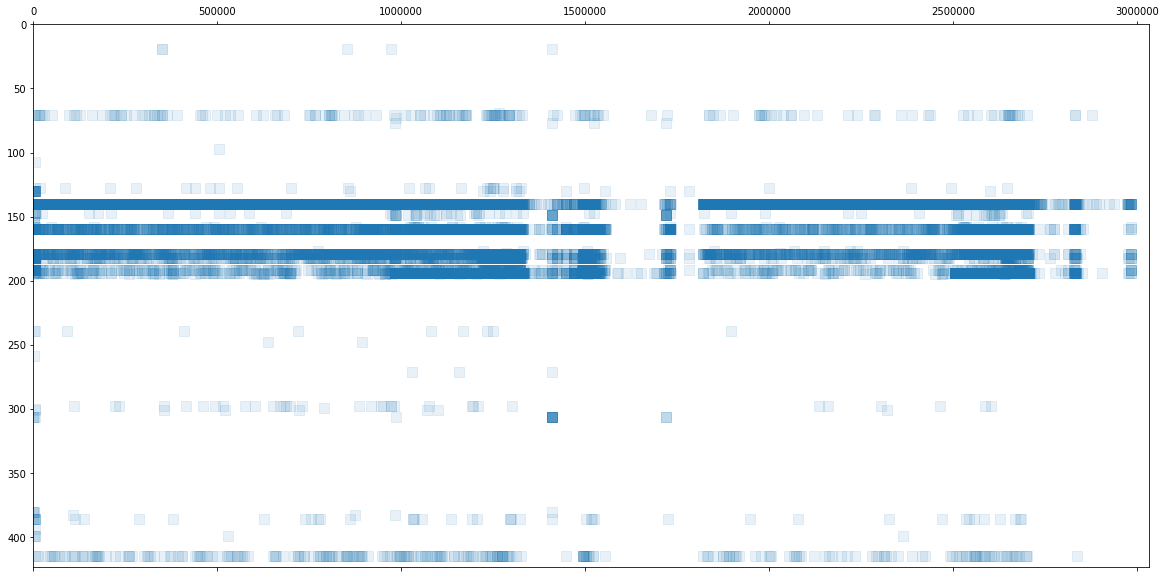

processing 2012 elections
3450.017008129997
election year 



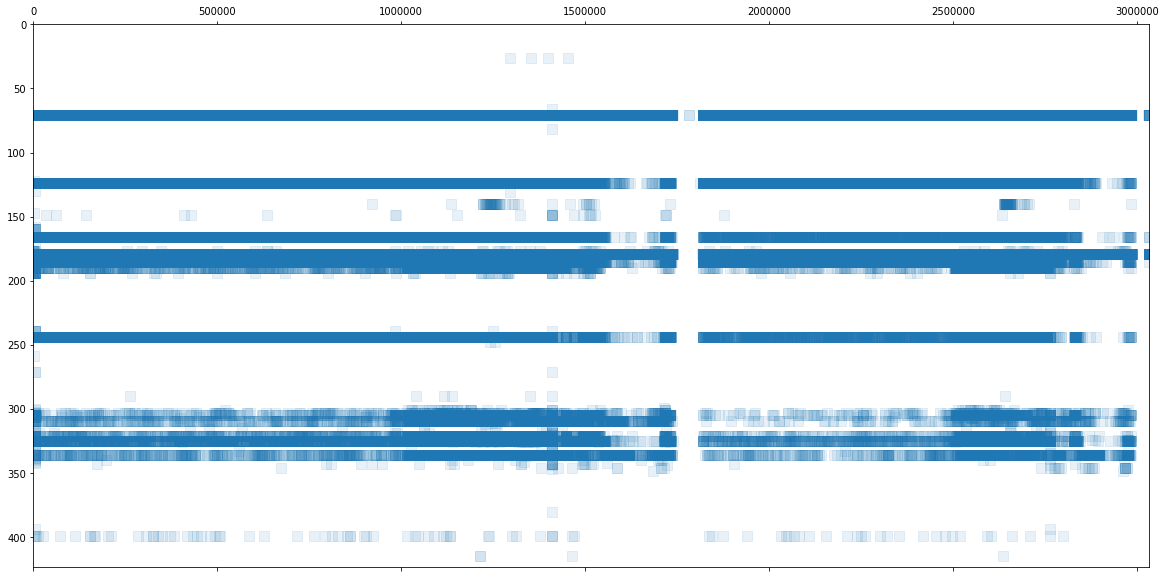

processing 2014 elections
274.2813520099999


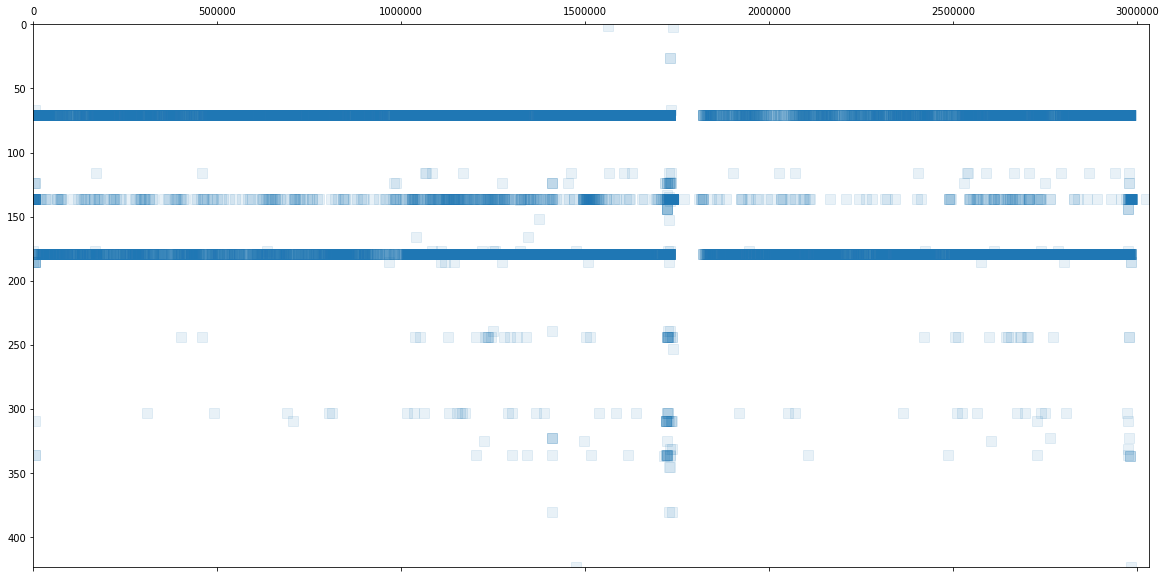

processing 2016 elections
382.92916651999985
election year 



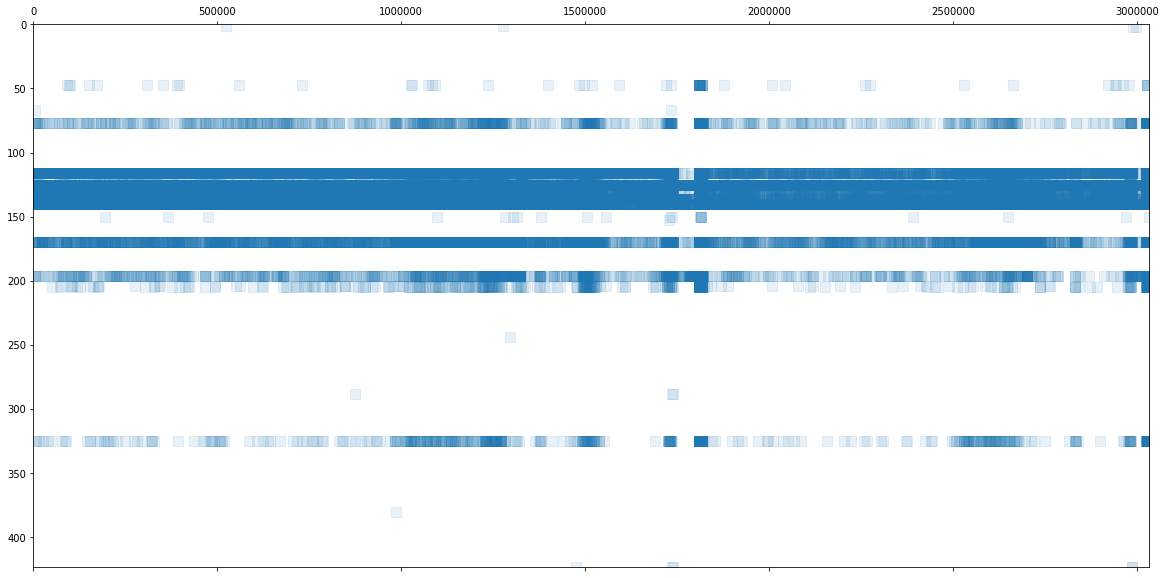

In [0]:

# Create sparse adjacency matrix for each year 
total_spending = []


for i in sorted(df['cycle'].unique()):
  print('processing %s elections'%(str(i)))
  
  # Subset year 
  year_df = df[df['cycle'] == i]
  
  # Map all rows in df to index of row for unique contributors / recipients 
  row = year_df['bonica.cid'].astype(contributors).cat.codes
  col = year_df['bonica.rid'].astype(recipients).cat.codes
  
  # Create scipy sparse matrix 
  sparse_matrix = csr_matrix((year_df["amount"], (row, col)), \
                           shape=(contributors.categories.size, recipients.categories.size))
  
  print(  sparse_matrix.sum() / 1000000)
  total_spending.append([i, sparse_matrix.sum() / 1000000 ])
  if i % 4 == 0:
    print('election year \n')
  
  # This works is just boring 
  plt.figure(figsize=(20,10))
  plt.spy(sparse_matrix.transpose(), aspect='auto',alpha=0.1)
  plt.show()
  
  
  
  
  # Run SVD on sparse matrix 
  #u, s, vt = svds(sparse_matrix, k=10)
  
  #print(i, s)
  
  # Transfer scipy sparse matrix to pandas - do you even need to do this? 
  """
  adj_df = pd.SparseDataFrame(sparse_matrix, \
                         index=contributors.categories, \
                         columns=recipients.categories, \
                         default_fill_value=0)
  """
  # This seems to be crashing
  #sns.heatmap(adj_df)
  #plt.show()
   
  
  # Save to csv - THIS APPEARS TO BE TOO TIME INTENSIVE
  #adj_df.to_csv(str(i)+'_cycle_adjacency_matrix.csv', index=False)

In [0]:
# Visualization for total yearly spending

ts_df = pd.DataFrame(total_spending, columns=['year', '$_mil'])

In [0]:
ts_df = ts_df.sort_values(by='year')

In [0]:
ts_df.reset_index(drop=True, inplace=True)

In [0]:
ts_df

,year,$_mil
0,1980,73.886991
1,1982,1.527273
2,1984,36.677973
3,1986,2.359969
4,1988,111.729474
5,1990,4.392902
6,1992,134.039589
7,1994,10.341489
8,1996,158.289671
9,1998,9.119239


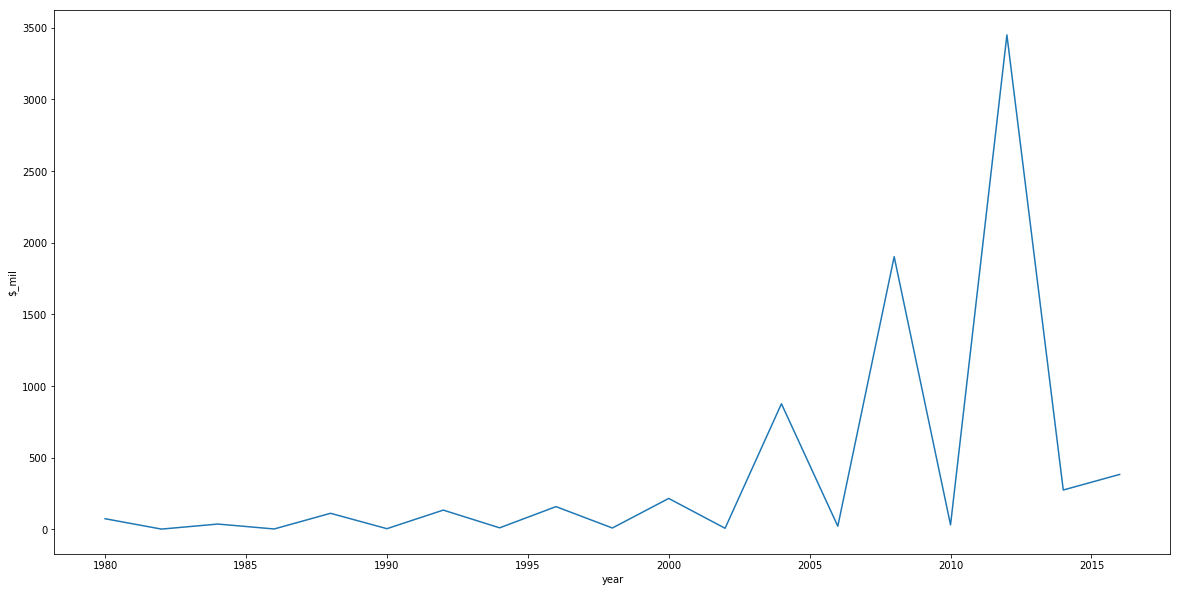

In [0]:
plt.figure(figsize=(20,10))
sns.lineplot(data=ts_df, x='year', y='$_mil')